# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [499]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [503]:
#Seu código aqui
# A)
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [505]:
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)
df.dtypes

Valor_Aluguel         int64
Valor_Condominio    float64
Metragem              int64
N_Quartos             int64
N_banheiros           int64
N_Suites              int64
N_Vagas               int64
dtype: object

In [507]:
# B)
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [510]:
#Seu código aqui
# A)
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


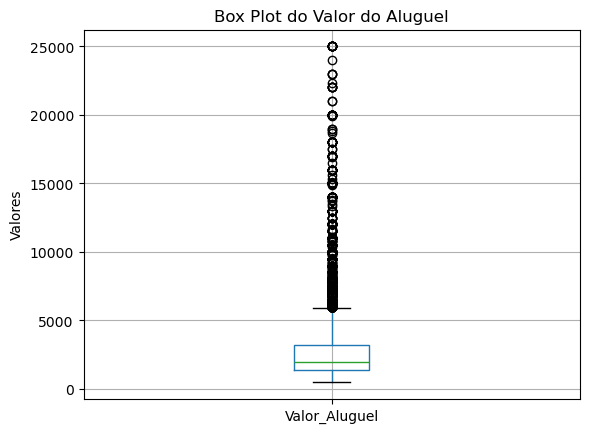

In [512]:
# B)
df.boxplot(column='Valor_Aluguel')
plt.title('Box Plot do Valor do Aluguel')
plt.ylabel('Valores')
plt.show()

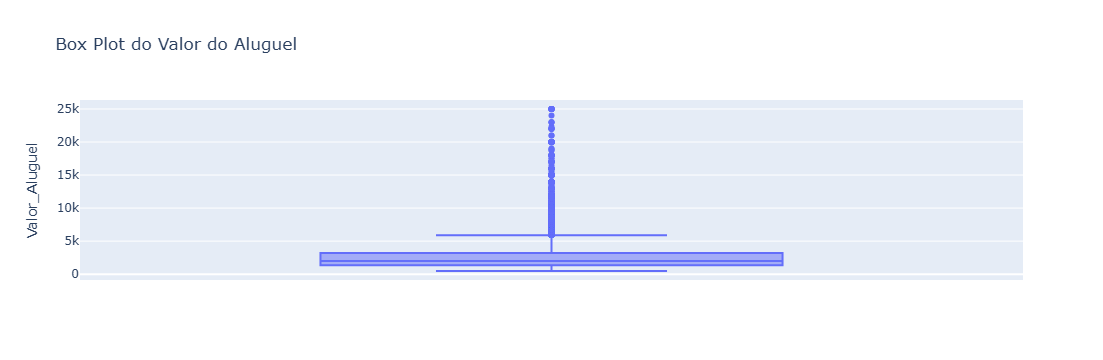

In [513]:
fig = px.box(df, y='Valor_Aluguel', title='Box Plot do Valor do Aluguel', labels={'Aluguel': 'Valores'})
fig.show()

In [515]:
df[df['Valor_Aluguel'] > 5900]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6454,5990,1188.0,164,3,5,3,3
6455,5999,1400.0,175,4,4,1,2
6456,6000,800.0,150,3,4,3,2
6457,6000,0.0,152,2,2,1,1
6458,6000,1100.0,43,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000,7500.0,627,4,5,4,6
7199,25000,4600.0,364,4,2,1,0
7200,25000,3700.0,266,3,4,3,7
7201,25000,6000.0,600,4,5,4,8


In [516]:
print("Porcentagem de registros onde 'Valor_Aluguel' > 5900:",
      (len(df[df['Valor_Aluguel'] > 5900]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Aluguel' > 5900: 10.398445092322643


In [520]:
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Valor_Aluguel'] >= limite_inferior) & (df['Valor_Aluguel'] <= limite_superior)]

mediana_sem_outliers = df['Valor_Aluguel'].median()

df.loc[df['Valor_Aluguel'] > 5900, 'Valor_Aluguel'] = mediana_sem_outliers

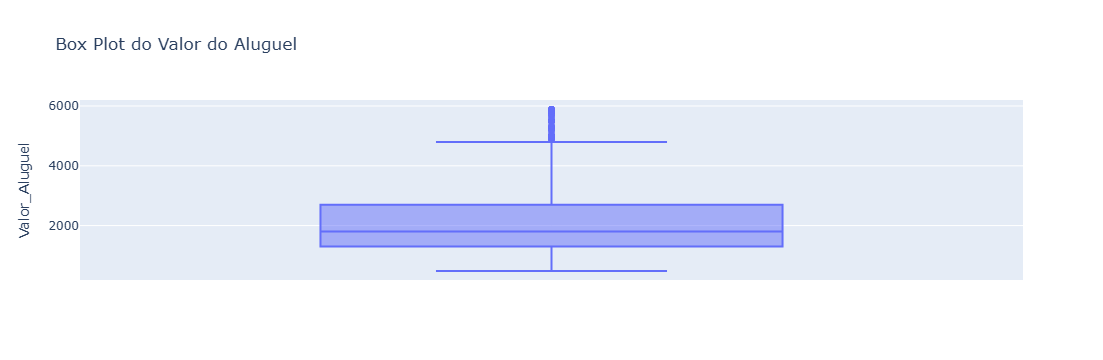

In [522]:
fig = px.box(df, y='Valor_Aluguel', title='Box Plot do Valor do Aluguel', labels={'Aluguel': 'Valores'})
fig.show()

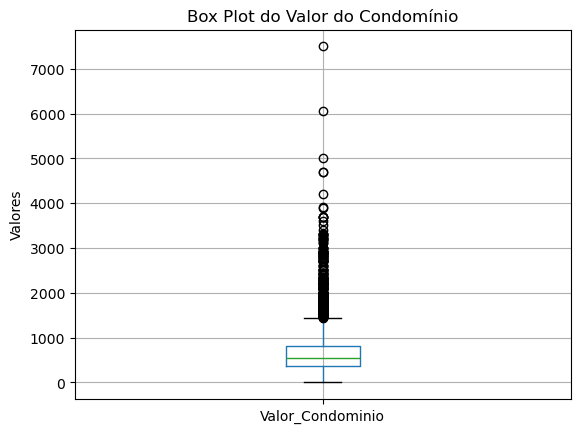

In [524]:
df.boxplot(column='Valor_Condominio')
plt.title('Box Plot do Valor do Condomínio')
plt.ylabel('Valores')
plt.show()

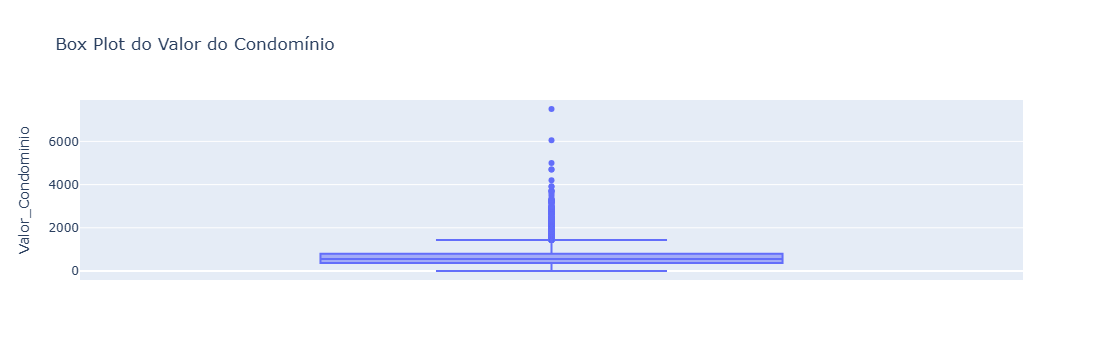

In [525]:
fig = px.box(df, y='Valor_Condominio', title='Box Plot do Valor do Condomínio', labels={'Condomínio': 'Valores'})
fig.show()

In [527]:
df[df['Valor_Condominio'] > 1440]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
337,944,1627.0,158,3,2,1,2
1199,1200,1700.0,161,3,2,1,2
1307,1200,1780.0,161,3,3,1,2
1333,1200,1700.0,105,3,3,1,2
1649,1300,2435.0,208,4,3,2,3
...,...,...,...,...,...,...,...
6438,5800,2181.0,209,4,4,3,4
6439,5800,2200.0,293,4,5,4,3
6445,5900,1460.0,62,1,2,1,2
6449,5900,1460.0,62,1,2,1,2


In [530]:
print("Porcentagem de registros onde 'Valor_Condominio' > 1440:",
      (len(df[df['Valor_Condominio'] > 1440]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Condominio' > 1440: 7.344282615432291


In [532]:
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Valor_Condominio'] >= limite_inferior) & (df['Valor_Condominio'] <= limite_superior)]

mediana_sem_outliers = df['Valor_Condominio'].median()

df.loc[df['Valor_Condominio'] > 1440, 'Valor_Condominio'] = mediana_sem_outliers

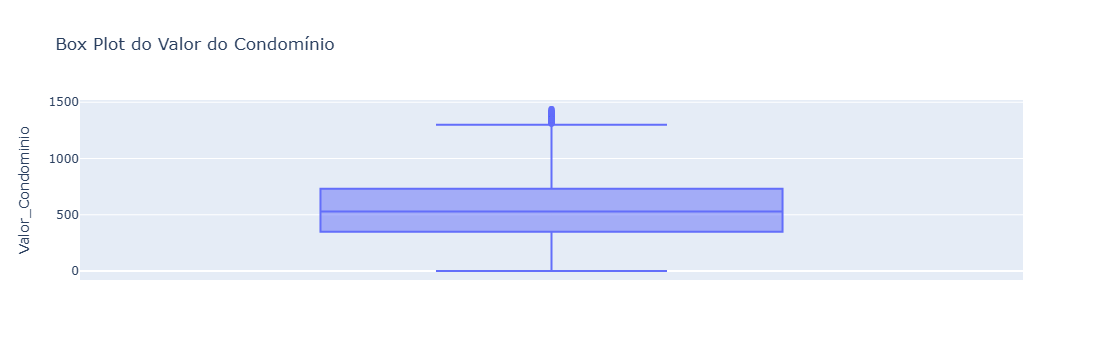

In [534]:
fig = px.box(df, y='Valor_Condominio', title='Box Plot do Valor do Condomínio', labels={'Condomínio': 'Valores'})
fig.show()

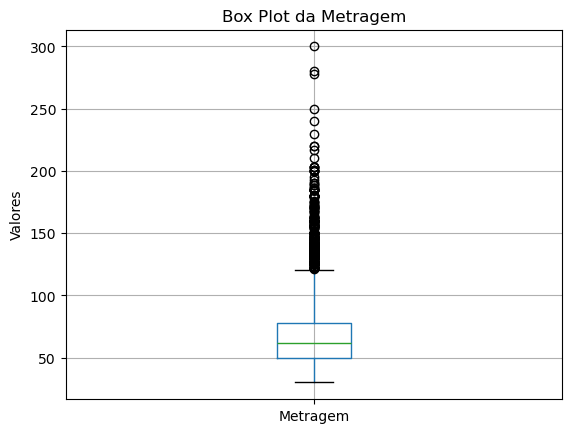

In [536]:
df.boxplot(column='Metragem')
plt.title('Box Plot da Metragem')
plt.ylabel('Valores')
plt.show()

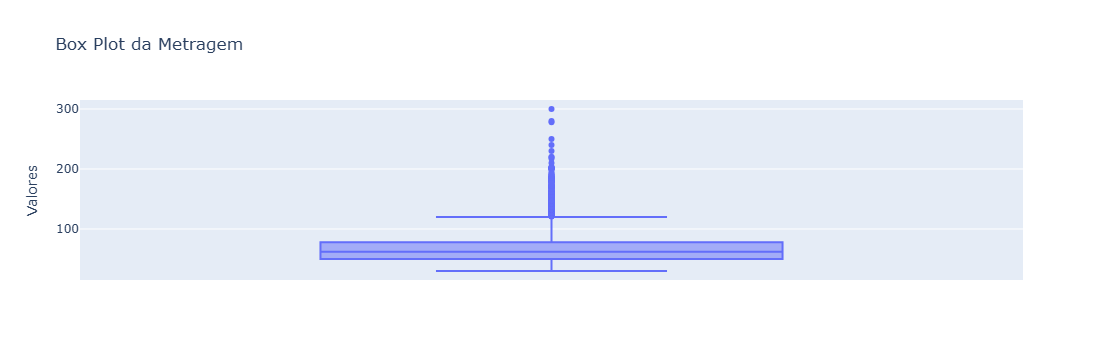

In [537]:
fig = px.box(df, y='Metragem', title='Box Plot da Metragem', labels={'Metragem': 'Valores'})
fig.show()

In [540]:
df[df['Metragem'] > 120]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
977,1165,585.0,130,2,2,1,1
1221,1200,1250.0,125,3,2,1,2
1989,1400,600.0,144,2,1,0,1
2313,1500,480.0,125,3,2,0,1
2326,1500,1350.0,127,3,4,3,2
...,...,...,...,...,...,...,...
6447,5900,1250.0,148,3,4,3,2
6448,5900,650.0,146,3,4,1,2
6451,5900,1250.0,148,3,4,3,2
6452,5900,650.0,146,3,2,1,2


In [542]:
print("Porcentagem de registros onde 'Metragem' > 120:",
      (len(df[df['Metragem'] > 120]) / len(df)) * 100)

Porcentagem de registros onde 'Metragem' > 120: 6.2040133779264215


In [544]:
Q1 = df['Metragem'].quantile(0.25)
Q3 = df['Metragem'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Metragem'] >= limite_inferior) & (df['Metragem'] <= limite_superior)]

mediana_sem_outliers = df['Metragem'].median()

df.loc[df['Metragem'] > 120, 'Metragem'] = mediana_sem_outliers

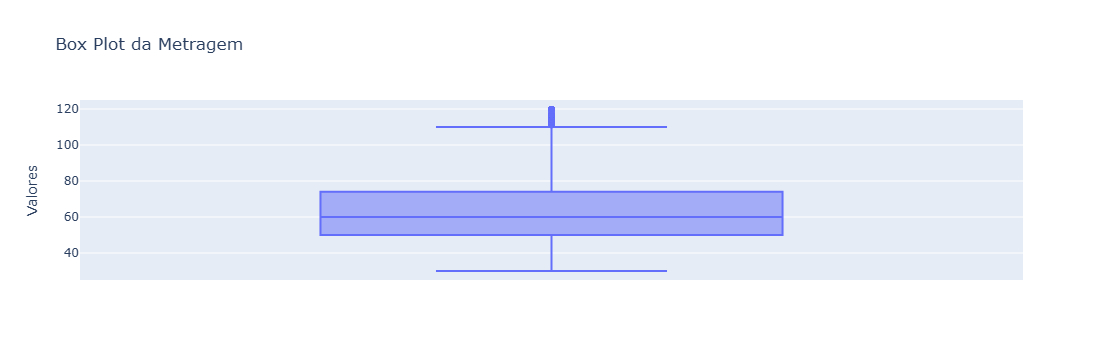

In [546]:
fig = px.box(df, y='Metragem', title='Box Plot da Metragem', labels={'Metragem': 'Valores'})
fig.show()

In [548]:
# C)
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295.0,48,2,2,1,1
1,500,0.0,50,1,2,1,1
2,500,0.0,40,1,2,1,1
3,500,36.0,45,1,2,1,0
4,500,0.0,30,1,1,0,0
5,500,380.0,66,2,1,0,1
6,550,100.0,48,2,2,1,1
7,600,110.0,46,2,2,1,1
8,600,100.0,49,2,2,1,1
9,600,325.0,50,2,2,1,1


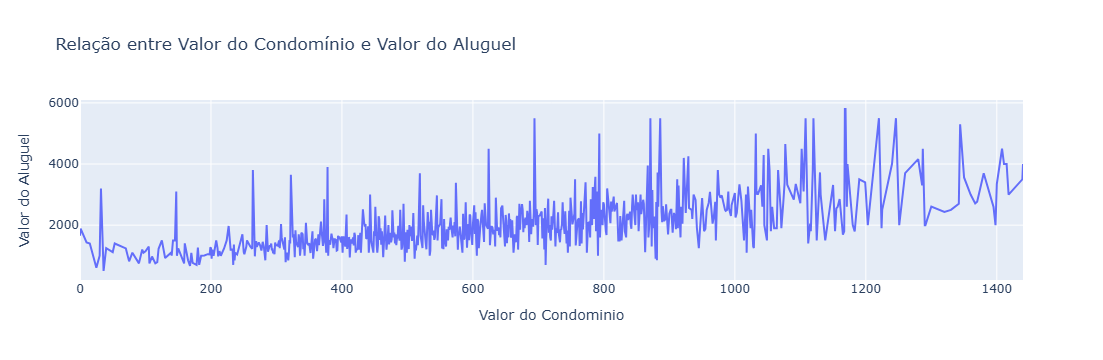

In [550]:
media_aluguel_por_condominio = df.groupby('Valor_Condominio')['Valor_Aluguel'].mean().reset_index()

fig = px.line(media_aluguel_por_condominio, x='Valor_Condominio', y='Valor_Aluguel',
              title='Relação entre Valor do Condomínio e Valor do Aluguel',
              labels={'Valor_Condominio': 'Valor do Condominio', 'Valor_Aluguel': 'Valor do Aluguel'})

fig.show()

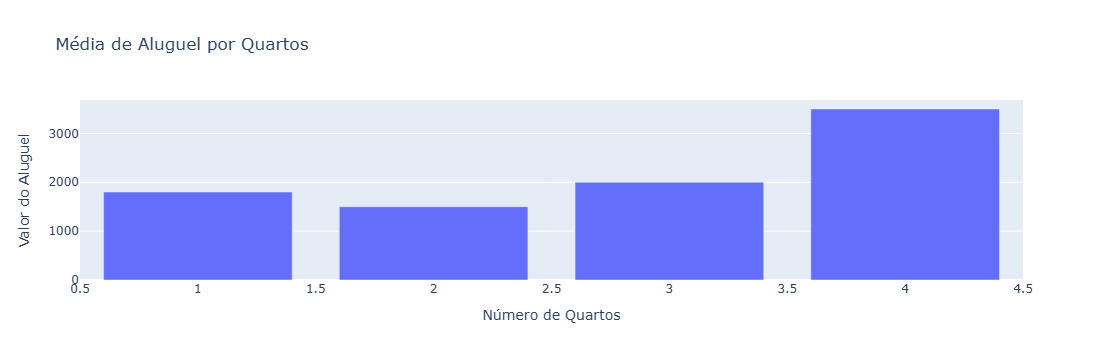

In [552]:
media_aluguel_por_quartos = df.groupby('N_Quartos')['Valor_Aluguel'].median().reset_index()

fig = px.bar(media_aluguel_por_quartos, x='N_Quartos', y='Valor_Aluguel',
             title='Média de Aluguel por Quartos',
             labels={'Valor_Aluguel': 'Valor do Aluguel', 'N_Quartos': 'Número de Quartos'})
fig.show()

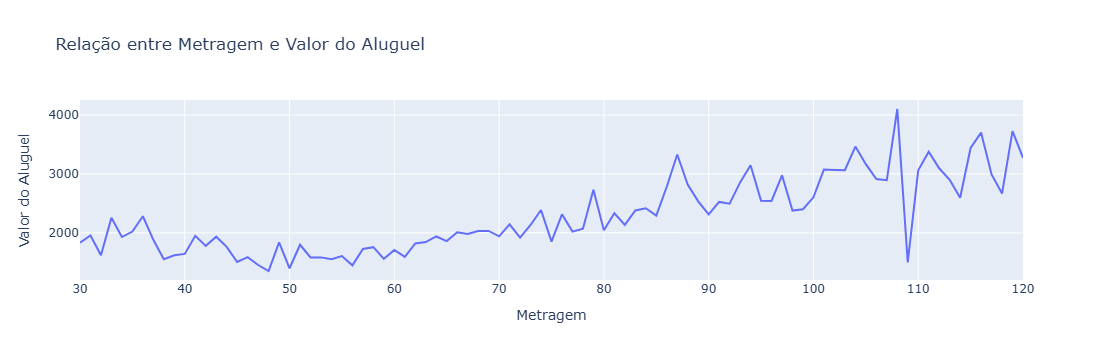

In [554]:
media_aluguel_por_metragem = df.groupby('Metragem')['Valor_Aluguel'].mean().reset_index()

fig = px.line(media_aluguel_por_metragem, x='Metragem', y='Valor_Aluguel',
              title='Relação entre Metragem e Valor do Aluguel',
              labels={'Metragem': 'Metragem', 'Valor_Aluguel': 'Valor do Aluguel'})

fig.show()

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [557]:
#Seu código aqui
df.corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.463908,0.406711,0.073724,0.246193,0.207343,0.359413
Valor_Condominio,0.463908,1.000000,0.493882,0.240941,0.192238,0.126008,0.409260
Metragem,0.406711,0.493882,1.000000,0.633547,0.329116,0.248690,0.450470
N_Quartos,0.073724,0.240941,0.633547,1.000000,0.285872,0.246112,0.365229
N_banheiros,0.246193,0.192238,0.329116,0.285872,1.000000,0.914805,0.392400
N_Suites,0.207343,0.126008,0.248690,0.246112,0.914805,1.000000,0.364273
N_Vagas,0.359413,0.409260,0.450470,0.365229,0.392400,0.364273,1.000000


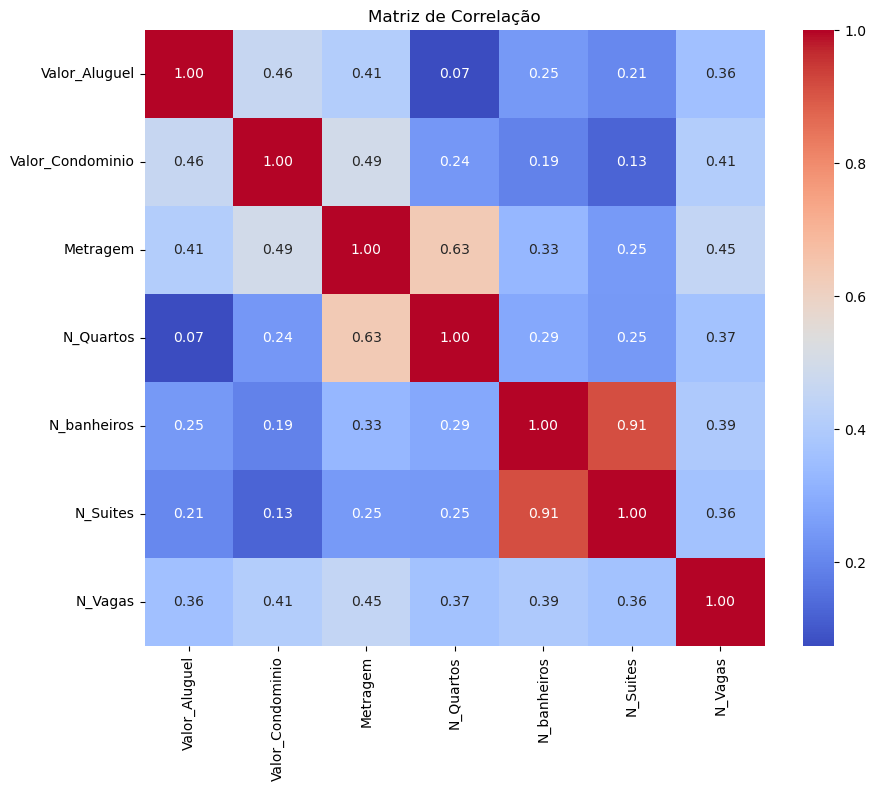

In [559]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [560]:
# Nas variáveis relacionadas ao valor do aluguel, a com maior correlação é o valor do condomínio, com a metragem vindo logo atrás. No geral, as duas variáveis com maior correlação são número de banheiro e número de suítes.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [564]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [567]:
# Seu código aqui

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [571]:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1654,639.0,75,3,2,0,1
3754,1291.0,70,2,2,1,1
6401,800.0,65,1,2,1,2
3679,588.0,51,2,1,0,1
1568,598.0,65,2,2,1,1
...,...,...,...,...,...,...
3857,790.0,114,2,4,1,2
5547,890.0,120,3,2,1,2
5603,1100.0,110,3,3,1,3
5876,500.0,60,2,1,0,1


In [573]:
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1022,400.0,55,2,2,1,1
4144,628.0,63,1,2,1,1
3366,800.0,90,2,2,0,1
2903,0.0,53,2,2,1,1
3502,290.0,60,2,2,1,1
...,...,...,...,...,...,...
257,0.0,48,2,2,1,1
508,610.0,72,2,1,0,1
6157,750.0,62,2,2,1,1
99,160.0,38,2,2,1,1


In [575]:
y_train

1654    1300
3754    2000
6401    5500
3679    2000
1568    1300
        ... 
3857    2025
5547    3500
5603    3500
5876    4000
861     1100
Name: Valor_Aluguel, Length: 4206, dtype: int64

In [577]:
y_test

1022    1200
4144    2250
3366    1800
2903    1700
3502    1900
        ... 
257      900
508     1000
6157    4700
99       760
2875    1650
Name: Valor_Aluguel, Length: 1403, dtype: int64

In [579]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (4206, 6)


In [581]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (1403, 6)


In [583]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (4206,)


In [585]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (1403,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [588]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [590]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
from sklearn.linear_model import LinearRegression

In [592]:
X

,Metragem
1654,75
3754,70
6401,65
3679,51
1568,65
...,...
3857,114
5547,120
5603,110
5876,60


In [594]:
regressao_valor_aluguel = LinearRegression()

regressao_valor_aluguel.fit(X,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [597]:
#Seu código Aqui
regressao_valor_aluguel.intercept_

727.1252121059013

In [599]:
regressao_valor_aluguel.coef_

array([18.80322236])

Nossa equação seria:  

In [602]:
# VALOR_ALUGUEL = 727.1*(METRAGEM) + 18.8

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [605]:
#Seu código aqui
regressao_valor_aluguel.score(X,y)

0.15713928550549494

In [607]:
# 0.15 é um valor extremamente baixo para um R², sendo uma correlação bem baixa.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

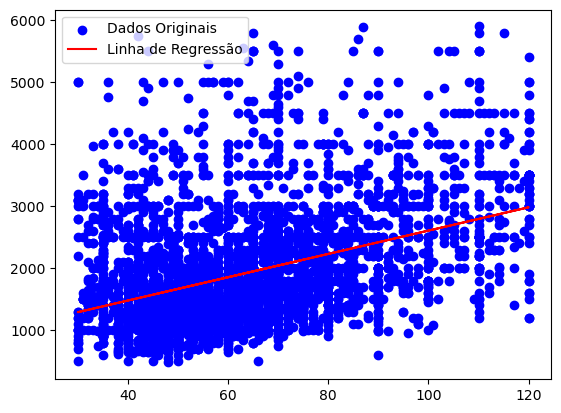

In [610]:
# Seu código aqui
plt.scatter(X, y, color='blue', label='Dados Originais')

plt.plot(X, regressao_valor_aluguel.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

In [611]:
# É difícil trazer insights sobre o gráfico, pois ele possui uma correlação muito baixa, então os pontos ficam muito dispersos, muito afastados da linha.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [615]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [617]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_valor_aluguel.predict(X_test)
previsoes

array([1761.30244168, 1911.72822053, 2419.41522414, ..., 1892.92499817,
       1441.64766163, 2513.43133592])

In [619]:
# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_valor_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.18712520604085503


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

In [624]:
# A diferença entre o R² para os dados de treinamento e teste é muito pequena, com os dados de teste sendo ligeiramente mais próximo de 1.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [628]:
#seu código aqui
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [632]:
X = X_train
y = y_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

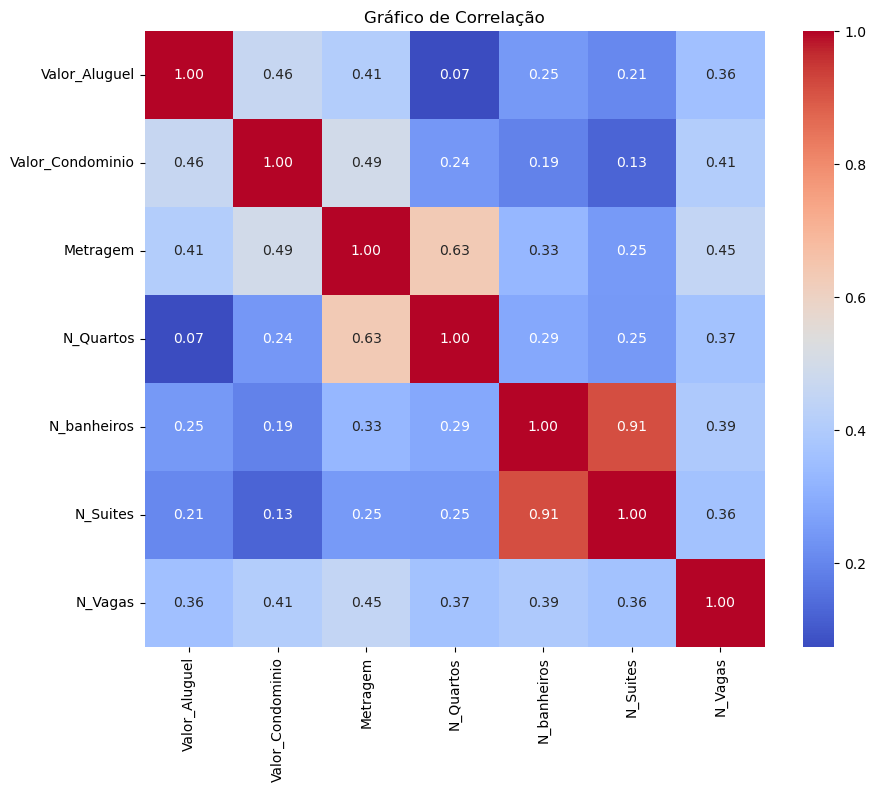

In [635]:
#seu código aqui
correlacao = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()

In [636]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X,y)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [640]:
#seu código aqui
regressao_multipla.score(X,y)

0.32627113164743726

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [643]:
#seu código aqui
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_test,y_test)

LinearRegression()

In [645]:
regressao_multipla.score(X_test,y_test)

0.36126865836018995

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui

In [649]:
# Os dados da regressão múltipla são melhores(mais próximos de 1) do que os dados de regressão linear. Acredito que tenha ocorrido exatamente pelo fato de ter mais variáveis, o que consegue fazer com que se encontrm mais correlações, deixando assim o R² mais perto de 1.